**first_sequence**

In [ ]:
import itertools
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tqdm as tqdm
import numpy as np

In [ ]:


def load_text_file(file_text):
    with open(file_text) as f:
        lines = f.readlines()
        my_data = [line.strip().upper() for line in lines[1::2]]
        return my_data


def read_test_file(filename):
    text_file = open(filename)
    lines = text_file.readlines()
    m = len(lines) // 5
    my_data = []
    for i in range(m):
        text = lines[i * 5 + 1].strip() + lines[i * 5 + 2].strip() + \
               lines[i * 5 + 3].strip() + lines[i * 5 + 4].strip()
        my_data.append(text.upper())

    return my_data

In [ ]:



def get_tokenizer():
    f = ['A','C','G','T']
    c = itertools.product(f, f, f, f, f, f, f)
    res = []
    for i in c:
        temp = i[0]+i[1]+i[2]+i[3]+i[4]+i[5]+i[6]
        res.append(temp)
    res = np.array(res)
    NB_WORDS = 16385
    tokenizer = Tokenizer(num_words=NB_WORDS)
    tokenizer.fit_on_texts(res)
    acgt_index = tokenizer.word_index
    acgt_index['null'] = 0
    return tokenizer


def sentence2word(str_set):
    word_seq = []
    for sr in str_set:
        tmp = []
        for i in range(len(sr)-6):
            if('N' in sr[i:i+7]):
                tmp.append('null')
            else:
                tmp.append(sr[i:i+7])
        word_seq.append(' '.join(tmp))
    return word_seq


def word2num(wordseq, tokenizer, MAX_LEN):
    sequences = tokenizer.texts_to_sequences(wordseq)
    numseq = pad_sequences(sequences, maxlen=MAX_LEN)
    return numseq


def sentence2num(str_set, tokenizer, MAX_LEN):
    wordseq = sentence2word(str_set)
    numseq = word2num(wordseq, tokenizer, MAX_LEN)
    return numseq


def get_data(enhancers):
    tokenizer = get_tokenizer()
    MAX_LEN = 200
    X_en = sentence2num(enhancers, tokenizer, MAX_LEN)
    return X_en

def get_tokenizer_onehot():
    f = ['A','C','G','T']
    res = []
    for i in f:
        res.append(i)
    res = np.array(res)
    NB_WORDS = 5
    tokenizer = Tokenizer(num_words=NB_WORDS)
    tokenizer.fit_on_texts(res)
    acgt_index = tokenizer.word_index
    acgt_index['null'] = 0
    return tokenizer


def sentence2char(str_set):
    char_seq = []
    for sr in str_set:
        tmp = []
        for i in range(len(sr)):
            if('N' in sr[i]):
                tmp.append('null')
            else:
                tmp.append(sr[i])
        char_seq.append(' '.join(tmp))
    return char_seq


def char2num(charseq, tokenizer, MAX_LEN):
    sequences = tokenizer.texts_to_sequences(charseq)
    numseq = pad_sequences(sequences, maxlen=MAX_LEN)
    return numseq


def sentence2num_onehot(str_set, tokenizer, MAX_LEN):
    charseq = sentence2char(str_set)
    numseq = char2num(charseq, tokenizer, MAX_LEN)
    return numseq


def get_data_onehot(enhancers):
    tokenizer = get_tokenizer_onehot()
    MAX_LEN = 200
    X_en = sentence2num_onehot(enhancers, tokenizer, MAX_LEN)


    return X_en



In [ ]:

train_strong = load_text_file('/content/drive/MyDrive/iEnhancer-DCLA/data/train_strong_enhancers.txt')
print("train_strong: ", len(train_strong))
train_weak = load_text_file('/content/drive/MyDrive/iEnhancer-DCLA/data/train_weak_enhancers.txt')
print("train_weak: ", len(train_weak))
train_enhancers = train_strong + train_weak
print("train_enhancers: ", len(train_enhancers))
train_non_enhancers = load_text_file('/content/drive/MyDrive/iEnhancer-DCLA/data/train_non_enhancers.txt')
print("train_non_enhancers: ", len(train_non_enhancers))
train_label_enhancers = np.ones((len(train_enhancers), ),dtype=int)
train_label_non_enhancers = np.zeros((len(train_non_enhancers), ),dtype=int)
train_data = train_enhancers + train_non_enhancers
train_label = np.hstack((train_label_enhancers,train_label_non_enhancers))
train_label = np.transpose([train_label])
#print(data)

test_strong = read_test_file('/content/drive/MyDrive/iEnhancer-DCLA/data/test_strong_enhancers.txt')
print("test_strong: ", len(test_strong))
test_weak = read_test_file('/content/drive/MyDrive/iEnhancer-DCLA/data/test_weak_enhancers.txt')
print("test_weak: ", len(test_weak))
test_enhancers = test_strong + test_weak
print("test_enhancers: ", len(test_enhancers))
test_non_enhancers = read_test_file('/content/drive/MyDrive/iEnhancer-DCLA/data/test_non_enhancers.txt')
print("test_non_enhancers: ", len(test_non_enhancers))
test_label_enhancers = np.ones((len(test_enhancers), ),dtype=int)
test_label_non_enhancers = np.zeros((len(test_non_enhancers), ),dtype=int)
test_data = test_enhancers + test_non_enhancers
test_label = np.hstack((test_label_enhancers,test_label_non_enhancers))
test_label = np.transpose([test_label])


X_en_tra_onehot = get_data_onehot(train_data)
X_en_tes_onehot = get_data_onehot(test_data)

np.savez('/content/drive/MyDrive/iEnhancer-DCLA/first_train_onehot.npz' ,
          X_en_tra=X_en_tra_onehot, y_tra=train_label)
np.savez('/content/drive/MyDrive/iEnhancer-DCLA/first_test_onehot.npz' ,
          X_en_tes=X_en_tes_onehot, y_tes=test_label)

train_strong:  742
train_weak:  742
train_enhancers:  1484
train_non_enhancers:  1484
test_strong:  100
test_weak:  100
test_enhancers:  200
test_non_enhancers:  200


**model**

In [1]:
# import numpy as np
# A = np.load('data_train.npz')
# print(A['X_en_tra'])

from tensorflow.keras import initializers
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
import tensorflow.keras
import numpy as np

MAX_LEN_en = 200
NB_WORDS = 16385
# NB_WORDS = 65
# NB_WORDS = 257
# NB_WORDS = 1025
# NB_WORDS = 4097
# NB_WORDS = 16385
# NB_WORDS = 65537
EMBEDDING_DIM = 100
embedding_matrix = np.load('/content/drive/MyDrive/iEnhancer-DCLA/embedding_matrix7.npy')
embedding_matrix_one_hot = np.array([[0, 0, 0, 0],
                                     [1, 0, 0, 0],
                                     [0, 1, 0, 0],
                                     [0, 0, 1, 0],
                                     [0, 0, 0, 1]])

In [2]:
class AttLayer(Layer):
    def __init__(self, attention_dim):
        # self.init = initializers.get('normal')
        self.init = initializers.RandomNormal(seed=10)
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(AttLayer, self).__init__()

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)))
        self.b = K.variable(self.init((self.attention_dim, )))
        self.u = K.variable(self.init((self.attention_dim, 1)))
        self.trainable_weight = [self.W, self.b, self.u]
        super(AttLayer, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return mask

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b))
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)

        ait = K.exp(ait)

        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            ait *= K.cast(mask, K.floatx())
        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) +
                      K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = x * ait
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [3]:
def get_model():
    enhancers = Input(shape=(MAX_LEN_en,))
    emb_en = Embedding(NB_WORDS, EMBEDDING_DIM, weights=[
                       embedding_matrix], trainable=True)(enhancers)
    enhancer_conv_layer = Convolution1D(
                                        filters=256,
                                        kernel_size=8,
                                        padding="same",  # "same"
                                        )
    enhancer_max_pool_layer = MaxPooling1D(pool_size=int(2))
    enhancer_conv_layer2 = Convolution1D(
                                        filters=128,
                                        kernel_size=8,
                                        padding="same",  # "same"
                                        )
    enhancer_max_pool_layer2 = MaxPooling1D(pool_size=int(2))
    # enhancer_conv_layer3 = Convolution1D(
    #                                     filters=64,
    #                                     kernel_size=8,
    #                                     padding="same",  # "same"
    #                                     )
    # enhancer_max_pool_layer3 = MaxPooling1D(pool_size=int(2))
    # Build enhancer branch
    enhancer_branch = Sequential()
    enhancer_branch.add(enhancer_conv_layer)
    enhancer_branch.add(Activation("relu"))
    enhancer_branch.add(enhancer_max_pool_layer)
    enhancer_branch.add(BatchNormalization())
    enhancer_branch.add(Dropout(0.2))
    enhancer_branch.add(enhancer_conv_layer2)
    enhancer_branch.add(Activation("relu"))
    enhancer_branch.add(enhancer_max_pool_layer2)
    enhancer_branch.add(BatchNormalization())
    enhancer_branch.add(Dropout(0.2))
    # enhancer_branch.add(enhancer_conv_layer3)
    # enhancer_branch.add(Activation("relu"))
    # enhancer_branch.add(enhancer_max_pool_layer3)
    # enhancer_branch.add(BatchNormalization())
    # enhancer_branch.add(Dropout(0.2))
    enhancer_out = enhancer_branch(emb_en)


    # l_gru_1 = Bidirectional(GRU(64, return_sequences=True))(enhancer_out)
    # l_att = AttLayer(64)(l_gru_1)
    # bn = BatchNormalization()(l_att_1)
    # dt = Dropout(0.2)(bn)

    l_gru = Bidirectional(LSTM(64, return_sequences=True))(enhancer_out)
    l_att = AttLayer(64)(l_gru)
    # l_gru = Bidirectional(SimpleRNN(64, return_sequences=True))(enhancer_out)
    # l_att = AttLayer(64)(l_gru)
    bn2 = BatchNormalization()(l_att)
    dt2 = Dropout(0.2)(bn2)
    #dt = BatchNormalization()(dt)
    #dt = Dropout(0.5)(dt)
    dt = Dense(64,kernel_initializer="glorot_uniform")(dt2)
    dt = BatchNormalization()(dt)
    dt = Activation("relu")(dt)
    dt = Dropout(0.2)(dt)
    preds = Dense(1, activation='sigmoid')(dt)
    model = Model([enhancers], preds)
    adam = tensorflow.keras.optimizers.Adam(lr=4e-5)
    model.compile(loss='binary_crossentropy',
                  optimizer=adam, metrics=['accuracy'])
    return model
    # 5e-6(测试集)  4e-5(训练集)

In [4]:
def get_model_onehot():
    enhancers = Input(shape=(MAX_LEN_en,))
    emb_en = Embedding(5, 4, weights=[embedding_matrix_one_hot],
                                  trainable=False)(enhancers)
    enhancer_conv_layer = Convolution1D(
                                        filters=256,
                                        kernel_size=8,
                                        padding="same",  # "same"
                                        )
    enhancer_max_pool_layer = MaxPooling1D(pool_size=int(2))
    enhancer_conv_layer2 = Convolution1D(
                                        filters=128,
                                        kernel_size=8,
                                        padding="same",  # "same"
                                        )
    enhancer_max_pool_layer2 = MaxPooling1D(pool_size=int(2))

    # Build enhancer branch
    enhancer_branch = Sequential()
    enhancer_branch.add(enhancer_conv_layer)
    enhancer_branch.add(Activation("relu"))
    enhancer_branch.add(enhancer_max_pool_layer)
    enhancer_branch.add(BatchNormalization())
    enhancer_branch.add(Dropout(0.2))
    enhancer_branch.add(enhancer_conv_layer2)
    enhancer_branch.add(Activation("relu"))
    enhancer_branch.add(enhancer_max_pool_layer2)
    enhancer_branch.add(BatchNormalization())
    enhancer_branch.add(Dropout(0.2))
    enhancer_out = enhancer_branch(emb_en)


    # l_gru_1 = Bidirectional(GRU(64, return_sequences=True))(enhancer_out)
    # l_att_1 = AttLayer(64)(l_gru_1)
    # bn = BatchNormalization()(l_att_1)
    # dt = Dropout(0.2)(bn)

    l_gru = Bidirectional(LSTM(64, return_sequences=True))(enhancer_out)
    l_att = AttLayer(64)(l_gru)
    bn2 = BatchNormalization()(l_att)
    dt2 = Dropout(0.2)(bn2)
    #dt = BatchNormalization()(dt)
    #dt = Dropout(0.5)(dt)
    dt = Dense(64,kernel_initializer="glorot_uniform")(dt2)
    dt = BatchNormalization()(dt)
    dt = Activation("relu")(dt)
    dt = Dropout(0.2)(dt)
    preds = Dense(1, activation='sigmoid')(dt)
    model = Model([enhancers], preds)
    adam = tensorflow.keras.optimizers.Adam(lr=5e-6)
    model.compile(loss='binary_crossentropy',
                  optimizer=adam, metrics=['accuracy'])
    return model


In [5]:

def get_model_1():
    l_att = Input(shape=(64,))
    preds = Dense(1, activation='sigmoid')(l_att)
    model = Model([l_att], preds)
    adam = tensorflow.keras.optimizers.Adam(lr=5e-6)
    model.compile(loss='binary_crossentropy',
                  optimizer=adam, metrics=['accuracy'])
    return model


In [6]:
def get_model_2():
    enhancers = Input(shape=(MAX_LEN_en,))
    model = Sequential()
    model.add(enhancers)
    model.add(Embedding(NB_WORDS, EMBEDDING_DIM, weights=[
                       embedding_matrix], trainable=True))
    model.add(Convolution1D(
                                        filters=256,
                                        kernel_size=8,
                                        padding="same",  # "same"
                                        ))
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=int(2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution1D(
                                        filters=128,
                                        kernel_size=8,
                                        padding="same",  # "same"
                                        ))
    model.add(Activation("relu"))
    model.add(MaxPooling1D(pool_size=int(2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(AttLayer(64))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64,kernel_initializer="glorot_uniform"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    adam = tensorflow.keras.optimizers.Adam(lr=4e-5)
    model.compile(loss='binary_crossentropy',
                  optimizer=adam, metrics=['accuracy'])
    return model
    # 5e-6(测试集)  4e-5(训练集)



**first_train**

In [7]:
!pip install scikeras



第0折


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 100)          1638500   
                                                                 
 sequential (Sequential)     (None, 50, 128)           468864    
                                                                 
 bidirectional (Bidirection  (None, 50, 128)           98816     
 al)                                                             
                                                                 
 att_layer (AttLayer)        (None, 128)               8320      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                            

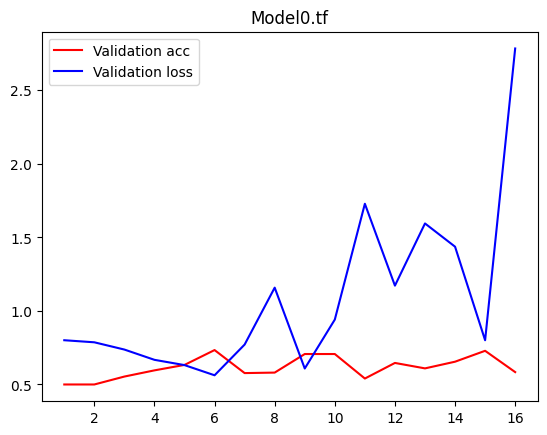



第1折


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 100)          1638500   
                                                                 
 sequential_1 (Sequential)   (None, 50, 128)           468864    
                                                                 
 bidirectional_1 (Bidirecti  (None, 50, 128)           98816     
 onal)                                                           
                                                                 
 att_layer_1 (AttLayer)      (None, 128)               8320      
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                          

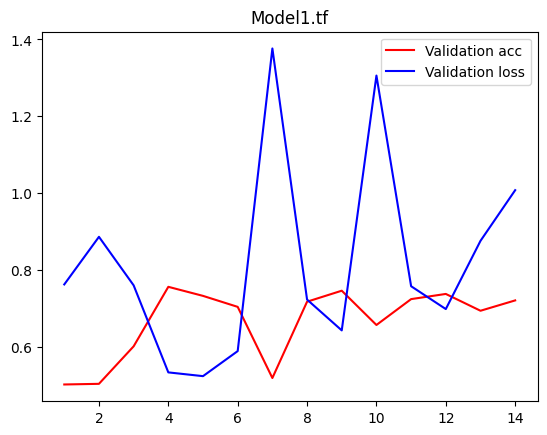



第2折


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 200, 100)          1638500   
                                                                 
 sequential_2 (Sequential)   (None, 50, 128)           468864    
                                                                 
 bidirectional_2 (Bidirecti  (None, 50, 128)           98816     
 onal)                                                           
                                                                 
 att_layer_2 (AttLayer)      (None, 128)               8320      
                                                                 
 batch_normalization_10 (Ba  (None, 128)               512       
 tchNormalization)                                         

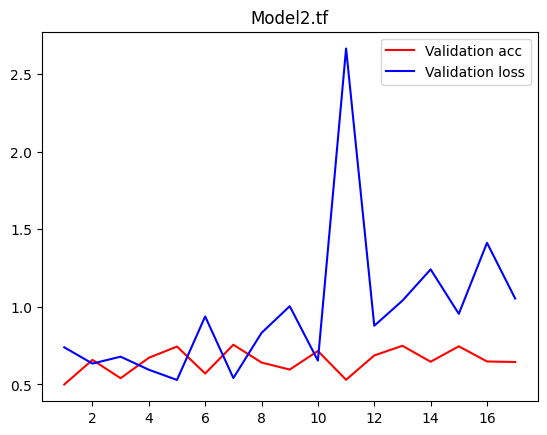



第3折


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 200, 100)          1638500   
                                                                 
 sequential_3 (Sequential)   (None, 50, 128)           468864    
                                                                 
 bidirectional_3 (Bidirecti  (None, 50, 128)           98816     
 onal)                                                           
                                                                 
 att_layer_3 (AttLayer)      (None, 128)               8320      
                                                                 
 batch_normalization_14 (Ba  (None, 128)               512       
 tchNormalization)                                         

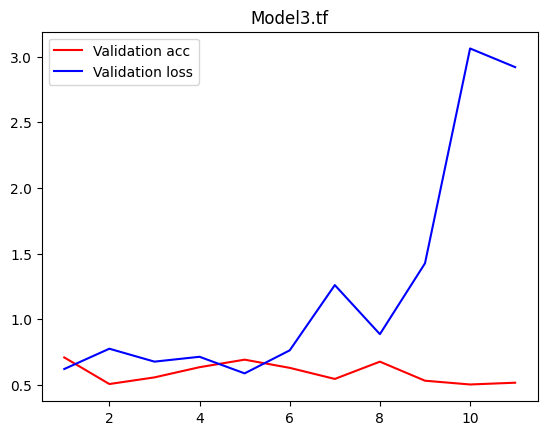



第4折


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 200, 100)          1638500   
                                                                 
 sequential_4 (Sequential)   (None, 50, 128)           468864    
                                                                 
 bidirectional_4 (Bidirecti  (None, 50, 128)           98816     
 onal)                                                           
                                                                 
 att_layer_4 (AttLayer)      (None, 128)               8320      
                                                                 
 batch_normalization_18 (Ba  (None, 128)               512       
 tchNormalization)                                         

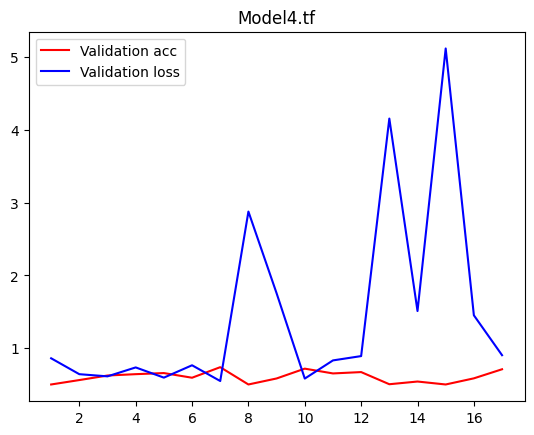

开始时间:2024-03-02-21:02:41结束时间：2024-03-02-21:54:21


In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
#from model import get_model, get_model_onehot, get_model_2
import numpy as np
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from datetime import datetime
from sklearn.metrics import roc_auc_score,average_precision_score, f1_score,recall_score,matthews_corrcoef,confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold
from scikeras.wrappers import KerasClassifier
from matplotlib import pyplot


t1 = datetime.now().strftime('%Y-%m-%d-%H:%M:%S')
batch_size = 32
names = ['first']
name=names[0]
Data_dir = 'D:/pycharm_pro/My-Enhancer-classification/%s/first_index/' % name
train = np.load('/content/drive/MyDrive/iEnhancer-DCLA/first_train_onehot.npz')
X_en_tra, y_tra = train['X_en_tra'], train['y_tra']
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

for i,(tra, val) in enumerate(kfold.split(X_en_tra, y_tra)):
    print('\n\n第%d折' % i)

    model=None
    model=get_model()
    model.summary()
    print ('Traing %s cell line specific model ...'%name)

    filepath = 'content/drive/MyDrive/iEnhancer-DCLA/firstModel0.tf.index'
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    callbacks_list = [checkpoint]
    back = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
    history=model.fit(X_en_tra[tra], y_tra[tra], validation_data=(X_en_tra[val], y_tra[val]), epochs=30, batch_size=batch_size,
                      callbacks=[callbacks_list, back])
    acc = history.history['val_accuracy']
    loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    pyplot.title('Model%d.tf' %(i) )
    pyplot.plot(epochs, acc, 'red', label='Validation acc')
    pyplot.plot(epochs, loss, 'blue', label='Validation loss')
    pyplot.legend()
    pyplot.show()
t2 = datetime.now().strftime('%Y-%m-%d-%H:%M:%S')
print("开始时间:"+t1+"结束时间："+t2)


**first test**

****************Testing first cell line specific model on first cell line****************


13/13 [==============================] - 7s 185ms/step


ACC :  0.69
SN :  0.78
SP :  0.6
MCC :  0.3863097476970662
AUC :  0.7725
AUPR :  0.7870465440360943
f1_score :  0.7155963302752293


<Figure size 640x480 with 0 Axes>

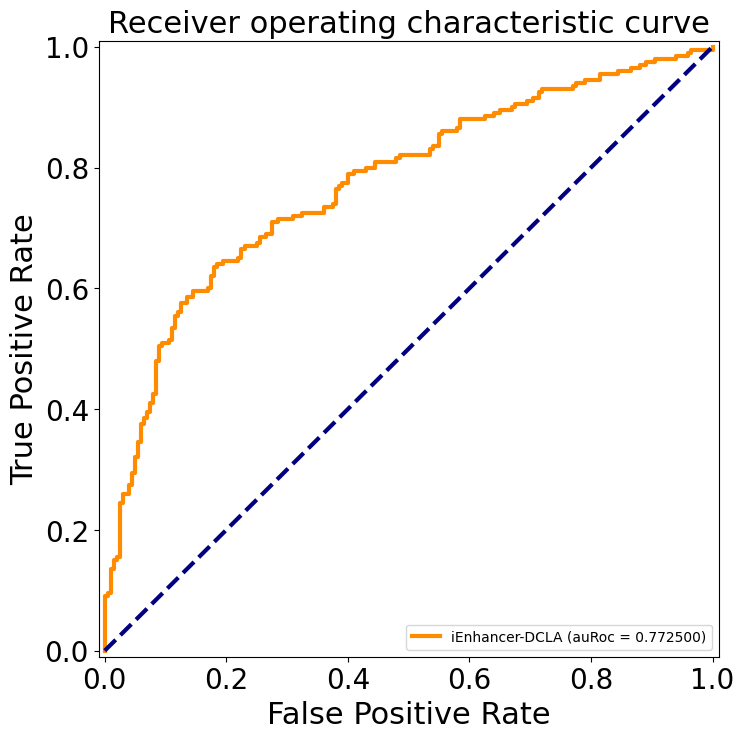

In [11]:
import sys
sys.path.append( '/content/drive/MyDrive/iEnhancer-DCLA/' )
#from model import get_model, get_model_onehot
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score,accuracy_score,recall_score,matthews_corrcoef,confusion_matrix,roc_curve, precision_recall_curve
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import matplotlib.pyplot as plt
# import umap
# import umap.plot
# from matplotlib.backends.backend_pdf import PdfPages

def plotROC(test,score):
    fpr,tpr,threshold = roc_curve(test, score)
    auc_roc = roc_auc_score(test, score)
    plt.figure()
    font = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 22,
         }
    lw = 3
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='iEnhancer-DCLA (auRoc = %f)' %auc_roc)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.tick_params(labelsize=20)
    plt.xlabel('False Positive Rate',font)
    plt.ylabel('True Positive Rate',font)
    plt.title('Receiver operating characteristic curve',font)
    plt.legend(loc="lower right")
    plt.savefig('x.jpg',dpi=350)
    plt.show()


names = ['first']
for name in names:
    for i in [0]:
        model = get_model()
        model.load_weights("content/drive/MyDrive/iEnhancer-DCLA/firstModel0.tf.index")
        Data_dir = 'D:/pycharm_pro/My-Enhancer-classification/%s/first_index/' % name
        test = np.load('/content/drive/MyDrive/iEnhancer-DCLA/first_test_onehot.npz')
        X_en_tes,  y_tes = test['X_en_tes'], test['y_tes']

        print("****************Testing %s cell line specific model on %s cell line****************" % (name, name))
        # model.fit(X_en_tes, y_tes)
        y_pred1 = model.predict([X_en_tes])
        y_pred = np.where(y_pred1 > 0.5, 1, 0)

        acc = accuracy_score(y_tes, y_pred)
        sn = recall_score(y_tes, y_pred)
        mcc = matthews_corrcoef(y_tes, y_pred)
        tn, fp, fn, tp = confusion_matrix(y_tes, y_pred).ravel()
        sp = tn / (tn + fp)
        auc = roc_auc_score(y_tes, y_pred1)
        aupr = average_precision_score(y_tes, y_pred1)
        f1 = f1_score(y_tes, np.round(y_pred1.reshape(-1)))
        print("ACC : ", acc)
        print("SN : ", sn)
        print("SP : ", sp)
        print("MCC : ", mcc)
        print("AUC : ", auc)
        print("AUPR : ", aupr)
        print("f1_score : ", f1)

        plotROC(y_tes, y_pred1)
